<a href="https://colab.research.google.com/github/daniivelascoo/ifp-programacion-ia/blob/main/Teoria_1_4_C_Relaciones_Heatmaps_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Teoría Bloque C: Buscando Relaciones (Scatter & Heatmaps)
**Sprint 1.4 - Visualización de Datos**

Para entrenar una IA, necesitamos saber qué datos influyen en el resultado.
*   *¿Si sube el precio, bajan las ventas?* (Correlación Negativa).
*   *¿Si sube la temperatura, sube el consumo de helados?* (Correlación Positiva).

Hoy aprenderemos a ver esto con **Scatterplots** y **Mapas de Calor**.

### 🎯 Objetivos:
1.  **Scatterplot (Dispersión):** Ver la relación entre dos variables numéricas.
2.  **Semántica Visual:** Añadir color (`hue`) y tamaño (`size`) para ver 4 dimensiones en un gráfico 2D.
3.  **Correlación y Heatmaps:** El mapa del tesoro de la IA.

## 1. El Scatterplot (Nubes de Puntos)

Es el gráfico fundamental para ver si X influye en Y.
Vamos a usar el dataset de `tips` (propinas) de nuevo.
Pregunta: **¿La gente que gasta más, deja más propina?**

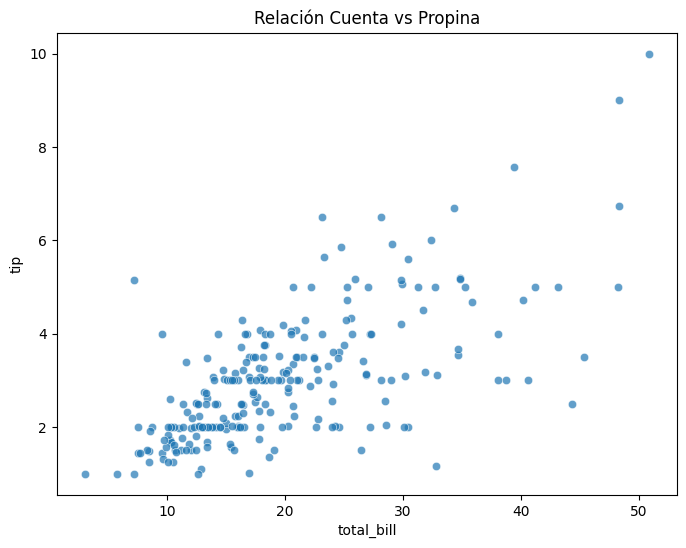

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cargamos datos
df = sns.load_dataset("tips")

plt.figure(figsize=(8, 6))

# 1. SCATTERPLOT BÁSICO
# Eje X: Total de la cuenta
# Eje Y: Propina
sns.scatterplot(data=df, x='total_bill', y='tip', alpha=0.7) # TODO: Usa la función scatterplot

plt.title("Relación Cuenta vs Propina")
plt.show()

# REFLEXIÓN:
# ¿Ves que los puntos suben en diagonal?
# Eso significa Correlación POSITIVA (A más cuenta, más propina).

## 2. Viendo 4 Dimensiones en una Pantalla 2D

El gráfico anterior es 2D. Pero tenemos más datos:
*   ¿Es la mesa de Fumadores? (Categoría).
*   ¿Cuántas personas comieron? (Número).

Podemos meter esa información en el gráfico usando:
*   **`hue` (Matiz/Color):** Para categorías (Fumador/No).
*   **`size` (Tamaño):** Para magnitudes (Personas).

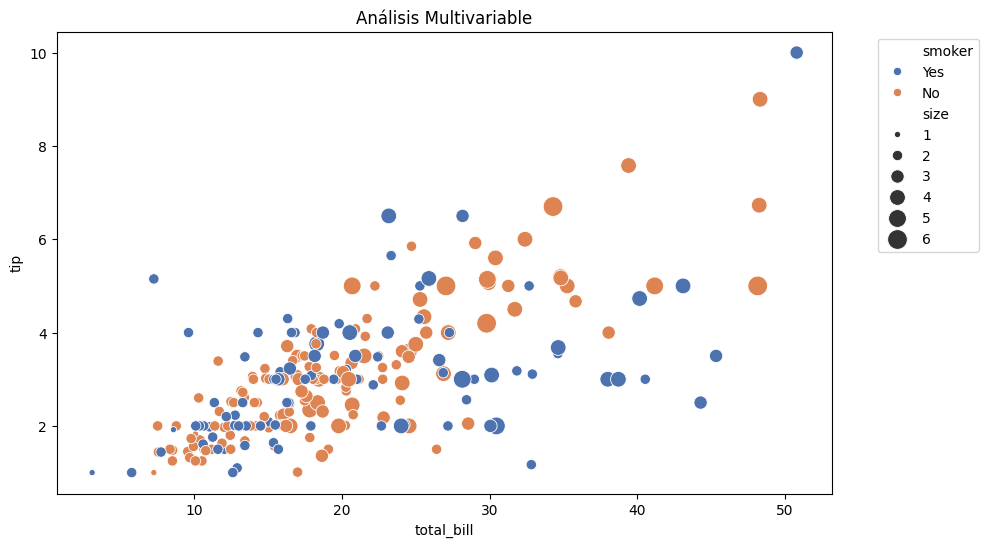

In [2]:
plt.figure(figsize=(10, 6))

# 2. SCATTERPLOT AVANZADO
sns.scatterplot(
    data=df,
    x='total_bill',
    y='tip',
    hue='smoker',   # TODO: Columna 'smoker' (Color)
    size='size',  # TODO: Columna 'size' (Tamaño del punto)
    sizes=(20, 200), # Rango de tamaños (mínimo, máximo)
    palette='deep'
)

plt.title("Análisis Multivariable")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Mover leyenda fuera
plt.show()

# PREGUNTA:
# ¿Ves los puntos grandes (mesas grandes) arriba a la derecha?
# Significa que las mesas grandes gastan más y dejan más propina. Lógico.

## 3. La Matriz de Correlación

A veces tenemos 20 columnas. No podemos hacer 20 scatterplots.
Usamos las matemáticas.
*   **1.0:** Relación perfecta positiva (Si X sube, Y sube).
*   **-1.0:** Relación perfecta negativa (Si X sube, Y baja).
*   **0:** No hay relación (Ruido).

In [3]:
# 1. CALCULAR CORRELACIÓN
# Pandas tiene la función .corr()
# Importante: numeric_only=True para ignorar texto
matriz_corr = df.corr(numeric_only=True) # TODO: Pon True

print("--- Matriz Matemática ---")
display(matriz_corr)

# Mira el cruce entre 'total_bill' y 'tip'.
# Debería ser un número alto (0.67 aprox).

--- Matriz Matemática ---


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


## 4. El Heatmap (Mapa de Calor)

La tabla de números de arriba es difícil de leer si tienes muchas columnas.
El **Heatmap** le asigna colores:
*   **Rojo/Caliente:** Correlación Alta.
*   **Azul/Frío:** Correlación Baja o Inversa.

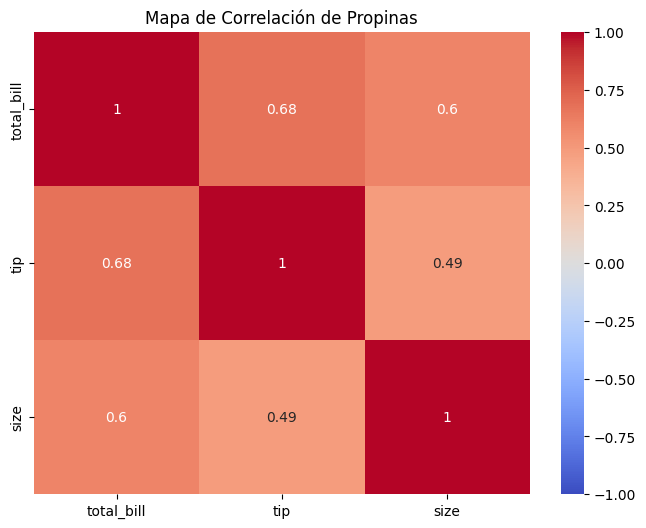

In [4]:
plt.figure(figsize=(8, 6))

# 2. DIBUJAR HEATMAP
# data: la matriz que calculamos antes
# annot=True: Para escribir el número dentro del cuadrado
# cmap: Mapa de colores ('coolwarm', 'viridis', 'Blues')

sns.heatmap(data=matriz_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1) # TODO: Función heatmap

plt.title("Mapa de Correlación de Propinas")
plt.show()

# CONCLUSIÓN VISUAL:
# Busca los cuadrados rojos (sin contar la diagonal de 1s).
# 'total_bill' y 'tip' están muy rojos -> ¡Están relacionados!
# 'size' y 'tip' también.